####` If ram pressure did not induce SF, we would see isolated SF regions all over the galaxy. For this, we take two sample sources defined in Fig. 7-box c and top source in box d. For source c, we calculate RMS noise of surrounding background (extinction ~ 0.2) and found that the young star's (flux~ 0.24) detection level above flux/noise ~ 3.81. Now, we want to see if we can detect  the same source when placed in the cloud. For the extinction, I used E(B-V) to find the extinction at particular region, then multiplied it from the current flux. The average extinction of the cloud was E(B-V) X R_V . With this correction, the flux of the source was calculate ~ 0.07 which is well above 3.02 significance level even though it is 2 times fainter.` 


In [1]:
# Initial imports
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from os import path
from photutils import CircularAperture, CircularAnnulus,RectangularAperture, RectangularAnnulus,aperture_photometry
from astropy.visualization import ImageNormalize, LogStretch,ManualInterval
%matplotlib notebook
import pyregion as pyreg
from astropy.table import Table
from astroptical.photometry import magnitude, magerr

ImgDir='/Users/sunil/Documents/TestESO_137_002/ESO-137-002/'

In [2]:
import extinction as ext
wave = np.array([2719.,4801. ])
f99=ext.Fitzpatrick99(3.1)(wave, 1.0)*3.1 # a_v=1, r_v=3.1;

In [2]:
#data
f275W=fits.open(path.join(ImgDir,'08_drc_cosmicray/F275W_drc_chip_cleaned.fits'))
f475W=fits.open(path.join(ImgDir,'08_drc_cosmicray/F475W_drc_chip_cleaned.fits'))

## source c

In [3]:
source=[(4391.753, 5889.8033)]

aper_source=(CircularAperture(source,r=5.))
bkg_aper = CircularAnnulus(source, r_in=5., r_out=10.)
apers = [aper_source, bkg_aper]

neigh=[(4399.441,5896.1704),(4400.6872,5886.1156),(4391.995,5879.9469),\
              (4383.7702,5884.6201),(4382.929,5893.9665),(4390.78,5899.3874)]
aper_neigh=(CircularAperture(neigh,r=5.))

In [5]:
# calculate flux for the source
phot_f275W_source=aperture_photometry(f275W['SCI'].data,apers,method='subpixel', subpixels=5)
phot_f275W_source['aperture_final'] = phot_f275W_source['aperture_sum_0'] - (phot_f275W_source['aperture_sum_1'] / bkg_aper.area) * aper_source.area;
print('source_flux_c:', '{:.4f}'.format(phot_f275W_source['aperture_final'][0]))

# calculate rms for the neighbors
phot_f275W_neigh=aperture_photometry(f275W['SCI'].data,aper_neigh,method='subpixel', subpixels=5)
print('std', '{:.4f}'.format(np.std(phot_f275W_neigh['aperture_sum'])))

# calculate the detection ratio
print('sigma #: ', '{:.4f}'.format(phot_f275W_source['aperture_final'][0]/np.std(phot_f275W_neigh['aperture_sum'])))

source_flux_c: 0.2361
std 0.0619
sigma #:  3.8129


<IPython.core.display.Javascript object>


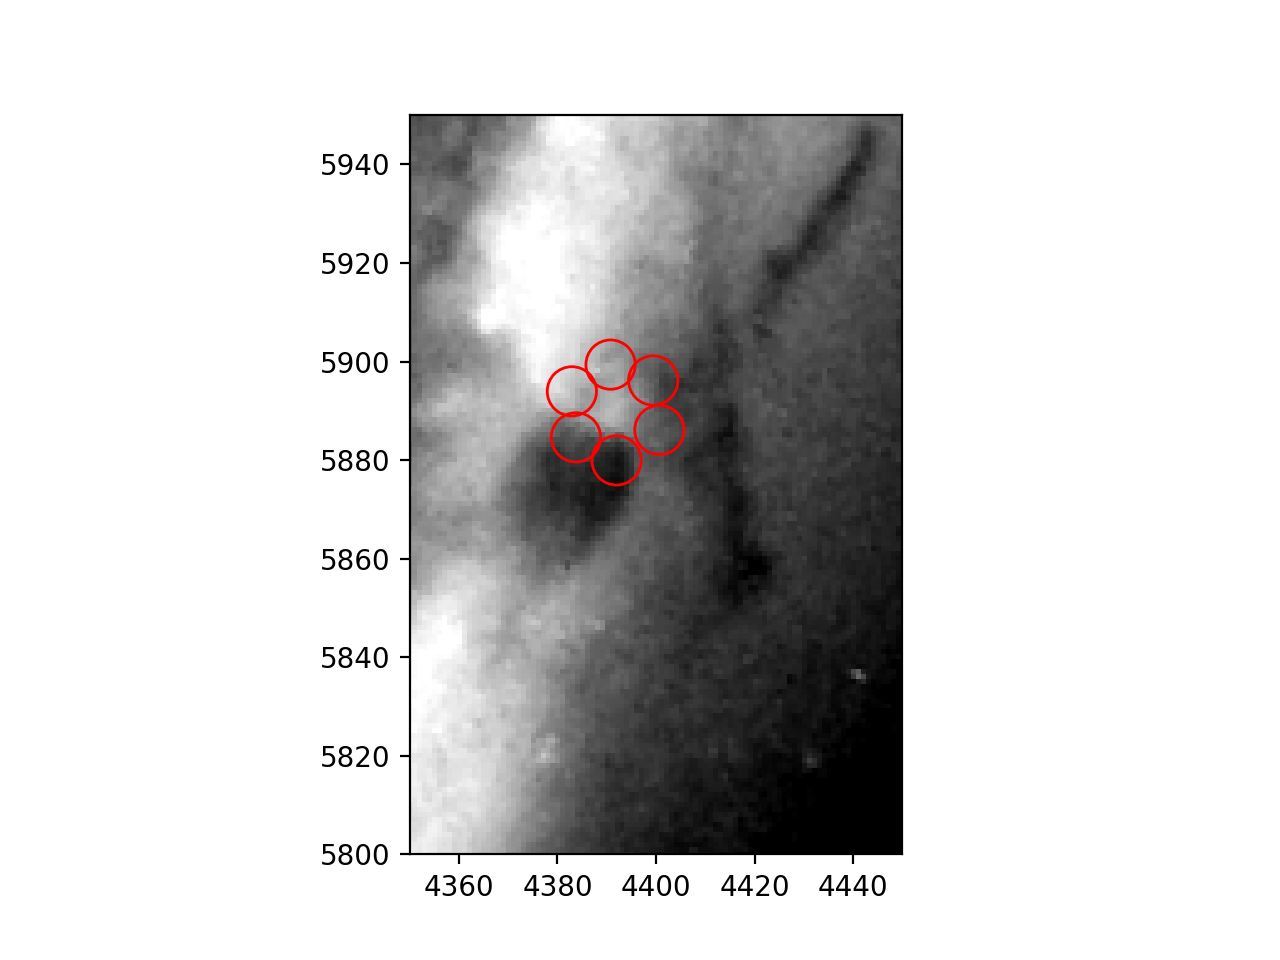

In [6]:
fig = plt.figure()
norm = ImageNormalize(f475W[1].data, interval=ManualInterval(vmin=0.1, vmax=0.40), #zscale as in ds9
                      stretch=LogStretch(0.9))
plt.imshow(f475W['SCI'].data,norm=norm,cmap='gray', origin="lower")
imdata=f475W['SCI'].data

#plt.imshow(imdata, cmap='gray', clim=(np.percentile(imdata,88),np.percentile(imdata,99)))
aper_neigh.plot(color='red',lw=1)
_ = plt.axis([4350,4450, 5800, 5950])


### when src placed in the cloud; extinction ~ 0.20

In [7]:
#Extinction
e_bv=0.20;
extImg = e_bv*f99[0];
value=phot_f275W_source['aperture_final'][0]*10**(-extImg/2.5)
print('source_flux at cloud', '{:.4f}'.format(value))

source_flux at cloud 0.0752


In [8]:
#delete later
print('e_bv', e_bv)
print('275 ext',f99[0])
print('extImg',e_bv*f99[0])

e_bv 0.2
275 ext 6.208702813098367
extImg 1.2417405626196736


In [9]:
neigh=[(4390.0879, 5879.6341),(4380.3085,5882.2691),(4375.5653,5874.1688),\
              (4385.0531,5871.3786),(4379.1941,5863.573),]
aper_neigh=(CircularAperture(neigh,r=5.))

In [10]:
phot_f275W_neigh=aperture_photometry(f275W['SCI'].data,aper_neigh,method='subpixel', subpixels=5)

# calculate rms for the neighbors
print('std', '{:.4f}'.format(np.std(phot_f275W_neigh['aperture_sum'])))

# calculate the detection ratio
print('sigma #: ', '{:.4f}'.format(value/np.std(phot_f275W_neigh['aperture_sum'])))

std 0.0249
sigma #:  3.0203


## source d

In [11]:

source=[(4262.8859,5647.1585)]

aper_source=(CircularAperture(source,r=3.))
bkg_aper = CircularAnnulus(source, r_in=3., r_out=4.)
apers = [aper_source, bkg_aper] 

neigh=[(4255.1323,5637.9497),(4266.7634,5636.343),(4273.7083,5645.5477),\
(4267.8945,5657.1751),(4256.4272,5656.8499),(4249.64,5648.1251)]
aper_neigh=(CircularAperture(neigh,r=3.))

In [12]:
# calculate flux for the source
phot_f275W_source=aperture_photometry(f275W['SCI'].data,apers,method='subpixel', subpixels=5)
phot_f275W_source['aperture_final'] = phot_f275W_source['aperture_sum_0'] - phot_f275W_source['aperture_sum_1'] / bkg_aper.area * aper_source.area;
print('source_flux_c:', '{:.4f}'.format(phot_f275W_source['aperture_final'][0]))

# calculate rms for the neighbors
phot_f275W_neigh=aperture_photometry(f275W['SCI'].data,aper_neigh,method='subpixel', subpixels=5)
print('std', '{:.4f}'.format(np.std(phot_f275W_neigh['aperture_sum'])))

# calculate the detection ratio
print('sigma #: ', '{:.4f}'.format(phot_f275W_source['aperture_final'][0]/np.std(phot_f275W_neigh['aperture_sum'])))

source_flux_c: 0.1031
std 0.0171
sigma #:  6.0350


### when src placed in the cloud; extinction ~ 0.35

In [13]:
#Extinction
e_bv=0.35;
extImg = f99[0]*e_bv;
value=phot_f275W_source['aperture_final'][0]*10**(-extImg/2.5)
print('source_flux at cloud', '{:.4f}'.format(value))

source_flux at cloud 0.0139


In [14]:
neigh =[(4254.5787,5625.4217),(4256.5165,5641.1179),(4261.3602,5632.0104),\
        (4263.8789,5623.6707),(4266.0095,5638.9829),(4257.8743,5617.082)]

neigh =[(4260.8984,5636.7073),
(4255.8841,5634.0677),
(4258.1718,5628.749)]



aper_neigh=(CircularAperture(neigh,r=3.))

In [15]:
phot_f275W_neigh=aperture_photometry(f275W['SCI'].data,aper_neigh,method='subpixel', subpixels=5)

# calculate rms for the neighbors
print('std', '{:.4f}'.format(np.std(phot_f275W_neigh['aperture_sum'])))

# calculate the detection ratio
print('sigma #: ', '{:.4f}'.format(value/np.std(phot_f275W_neigh['aperture_sum'])))

std 0.0032
sigma #:  4.3407
